# KNN


In [1]:
import pandas as pd
import preprocessing as pp
import formatPredictions as fp
import metrics as m
import datasets as datasets
import matplotlib.pyplot as plt

# Importacion KNN
from sklearn.neighbors import KNeighborsClassifier

# Importacion preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
def normalizar_datos_estandar(X_train):
  standardScaler = StandardScaler() 
  standardScaler.fit(X_train)   
  return standardScaler

In [3]:
def normalizar_datos_minmax(X_train):
  minMaxScaler = MinMaxScaler()
  minMaxScaler.fit(X_train)   
  return minMaxScaler

# Entrenamiento con todos los features y normalizacion estandar

In [4]:
dfTrain = datasets.getDataTrain()

dfTrain_feature_engineering = pp.preprocessing_KNN_con_todos_los_features(dfTrain)

X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [5]:
standard_scaler_features_completos = normalizar_datos_estandar(X_train)
X_train = standard_scaler_features_completos.transform(X_train) 
X_test_normalized = standard_scaler_features_completos.transform(X_test)

In [6]:
knn_features_completos_normalizacion_estandar = KNeighborsClassifier(n_neighbors=8)
knn_features_completos_normalizacion_estandar.fit(X_train, y_train)
y_pred = knn_features_completos_normalizacion_estandar.predict(X_test_normalized)

# Metricas

Accuracy: 0.8252725318593582

Precision: 0.6749146757679181

Recall: 0.923262839879154

F1 Score: 0.5816176470588235

Matriz de confusion: 
[[4584  381]
 [ 757  791]]

AUC-ROC: 



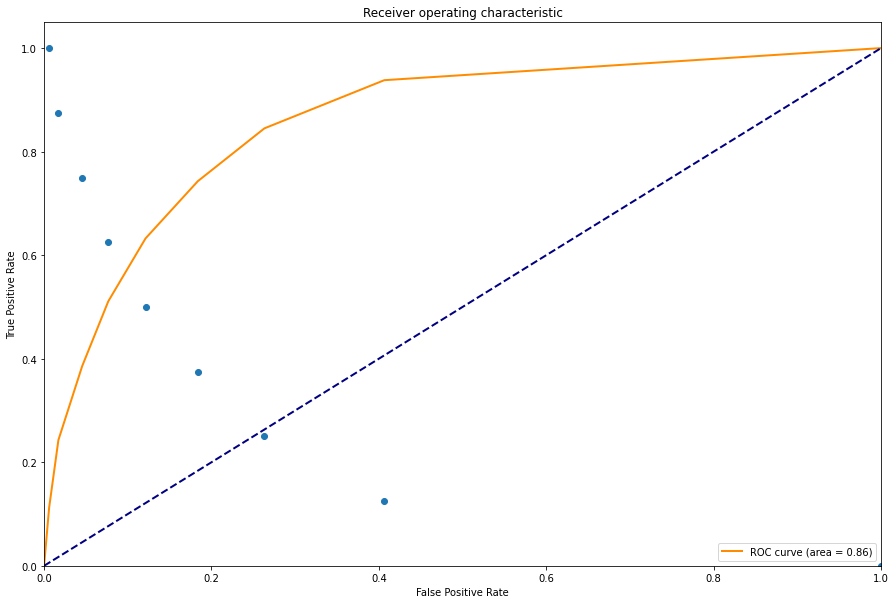

0.8595851190894399

In [7]:
m.getMetrics(y_test, y_pred, knn_features_completos_normalizacion_estandar.predict_proba(X_test_normalized)[:,1])

# Entrenamiento con todos los features y normalizacion MinMax

In [8]:
dfTrain = datasets.getDataTrain()

dfTrain_feature_engineering = pp.preprocessing_KNN_con_todos_los_features(dfTrain)

X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
minmax_scaler_features_completos = normalizar_datos_minmax(X_train)
X_train = minmax_scaler_features_completos.transform(X_train) 
X_test_normalized = minmax_scaler_features_completos.transform(X_test)

In [10]:
knn_features_completos_normalizacion_minmax = KNeighborsClassifier(n_neighbors=8)
knn_features_completos_normalizacion_minmax.fit(X_train, y_train)
y_pred = knn_features_completos_normalizacion_minmax.predict(X_test_normalized)

# Metricas

Accuracy: 0.8304928604329802

Precision: 0.6920556920556921

Recall: 0.9238866396761134

F1 Score: 0.6048675733715104

Matriz de confusion: 
[[4564  376]
 [ 728  845]]

AUC-ROC: 



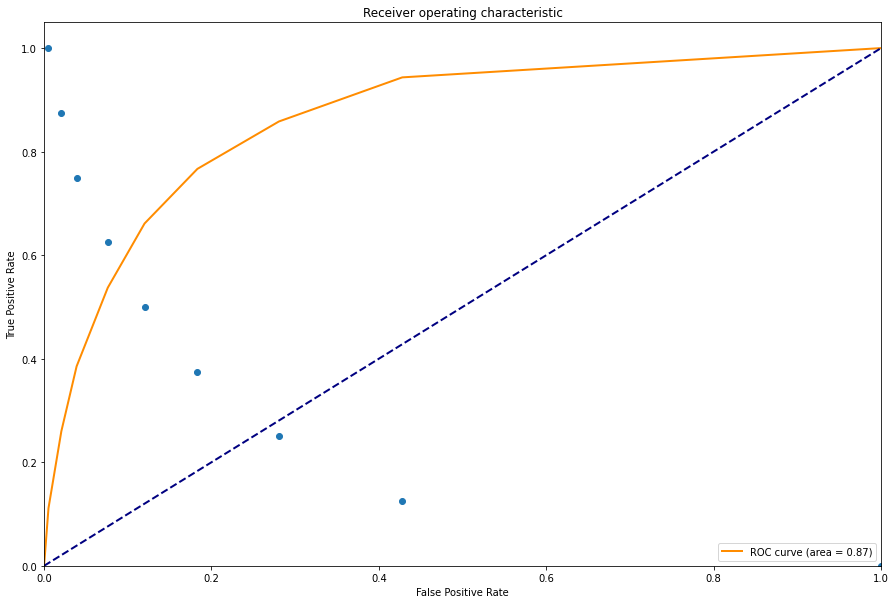

0.8653579122386631

In [11]:
m.getMetrics(y_test, y_pred, knn_features_completos_normalizacion_minmax.predict_proba(X_test_normalized)[:,1])

# Entrenamiento con seleccion y normalizacion estandar

In [12]:
dfTrain = datasets.getDataTrain()

dfTrain_feature_engineering = pp.feature_engineering_KNN_con_seleccion(dfTrain)

X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [13]:
standard_scaler_features_seleccion = normalizar_datos_estandar(X_train)
X_train = standard_scaler_features_seleccion.transform(X_train) 
X_test_normalized = standard_scaler_features_seleccion.transform(X_test)

In [14]:
knn_features_seleccion_normalizacion_estandar = KNeighborsClassifier(n_neighbors=8)
knn_features_seleccion_normalizacion_estandar.fit(X_train, y_train)
y_pred = knn_features_seleccion_normalizacion_estandar.predict(X_test_normalized)

# Metricas

Accuracy: 0.8211269768155995

Precision: 0.6462530217566479

Recall: 0.9119358074222668

F1 Score: 0.5792704947634525

Matriz de confusion: 
[[4546  439]
 [ 726  802]]

AUC-ROC: 



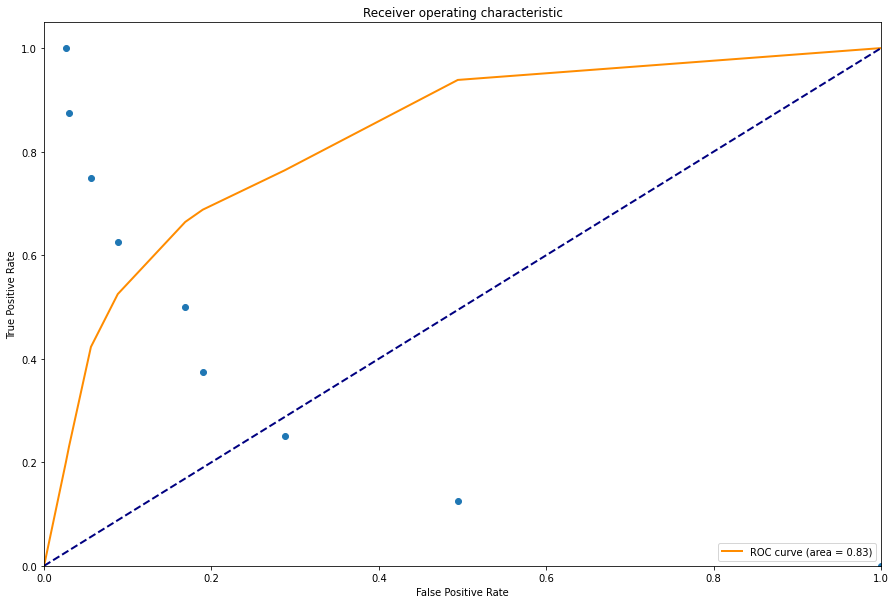

0.8264813419315538

In [15]:
m.getMetrics(y_test, y_pred, knn_features_seleccion_normalizacion_estandar.predict_proba(X_test_normalized)[:,1])

# Entrenamiento con seleccion y normalizacion MinMax

In [16]:
dfTrain = datasets.getDataTrain()

dfTrain_feature_engineering = pp.feature_engineering_KNN_con_seleccion(dfTrain)

X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [17]:
minmax_scaler_features_completos = normalizar_datos_minmax(X_train)
X_train = minmax_scaler_features_completos.transform(X_train) 
X_test_normalized = minmax_scaler_features_completos.transform(X_test)

In [18]:
knn_features_seleccion_normalizacion_minmax = KNeighborsClassifier(n_neighbors=8)
knn_features_seleccion_normalizacion_minmax.fit(X_train, y_train)
y_pred = knn_features_seleccion_normalizacion_minmax.predict(X_test_normalized)

# Metricas

Accuracy: 0.7841240595731613

Precision: 0.5776986951364176

Recall: 0.9284565916398714

F1 Score: 0.4092436974789916

Matriz de confusion: 
[[4620  356]
 [1050  487]]

AUC-ROC: 



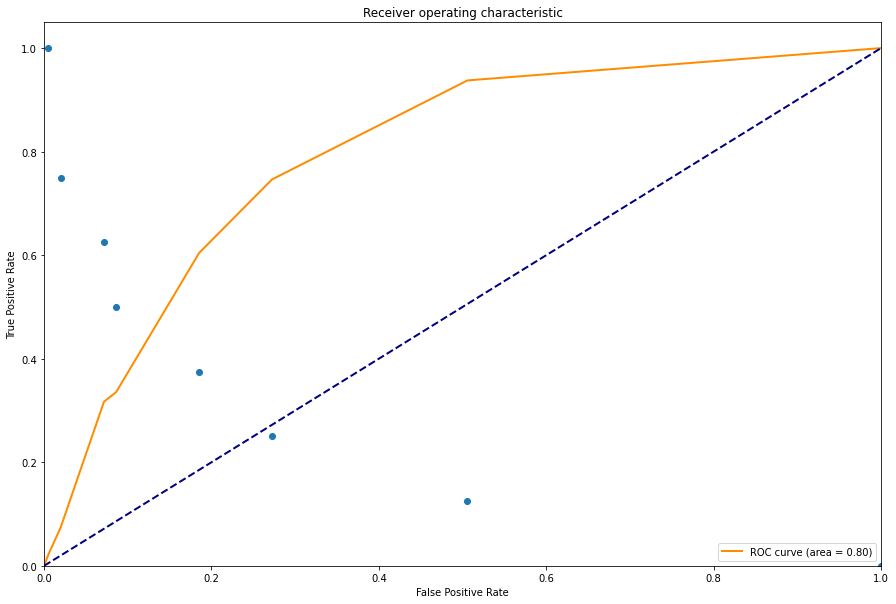

0.7963362722721634

In [19]:
m.getMetrics(y_test, y_pred, knn_features_seleccion_normalizacion_minmax.predict_proba(X_test_normalized)[:,1])

# Prediccion del set objectivo usando entrenamiento con todos los features y normalizacion estandar

In [20]:
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.preprocessing_KNN_con_todos_los_features(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
standard_scaler_features_completos = normalizar_datos_estandar(X_train)
X_train = standard_scaler_features_completos.transform(X_train) 

In [21]:
# Obtengo el set para predecir
dfObjetivo = datasets.getDataHoldout()

# Elimino columnas "representatividad_poblacional" y "id"
dfObjetivo.drop(columns = ['representatividad_poblacional', 'id'], inplace = True)

dfObjetivo_feature_engineering = pp.preprocessing_KNN_con_todos_los_features(dfObjetivo)
X_normalized = standard_scaler_features_completos.transform(dfObjetivo_feature_engineering)

predicciones = knn_features_completos_normalizacion_minmax.predict(X_normalized)
predicciones

array([0, 0, 0, ..., 1, 0, 1])

In [22]:
fp.exportPredictions(fp.formatPredictions(predicciones), "KNN")